In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

plt.rc('font',family='NanumGothic ECO')
plt.rc('axes',unicode_minus=False)

In [2]:
data= pd.read_csv("/home/piai/second_week/2. Big Data 분석/Car.csv", encoding='euc-kr')
data.head(10)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
5,Hyundai EON LPG Era Plus Option,Hyderabad,3602.46,2012,75000,LPG,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
6,Nissan Micra Diesel XV,Jaipur,5365.36,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,26826.80,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh
8,Volkswagen Vento Diesel Comfortline,Pune,7971.39,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
9,Tata Indica Vista Quadrajet LS,Chennai,2989.27,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
data.describe()

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [5]:
data['Power'] = data['Power'].replace('null', pd.NA)
data=data.dropna(subset=['Engine','Power','Mileage'])
data.isnull().sum()

Name                    0
Location                0
Price                1043
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   7
New_Price            6200
dtype: int64

In [6]:
data['Mileage'] = data['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
data['Engine'] = data['Engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(int)
data['Power'] = data['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
data['New_Price'] = data['New_Price'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

In [15]:
data.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price
count,6162.000000,7205.000000,7.205000e+03,7205.000000,7205.000000,7205.000000,7198.000000,1005.000000
mean,14938.171315,2013.388758,5.863672e+04,18.178300,1616.762665,18.178300,5.279800,19.900607
std,17697.538792,3.237501,8.466067e+04,4.513001,595.085712,4.513001,0.811759,19.822809
min,7.080000,1996.000000,1.710000e+02,0.000000,624.000000,0.000000,0.000000,1.000000
25%,5365.360000,2011.000000,3.400000e+04,15.200000,1198.000000,15.200000,5.000000,7.630000
50%,8814.520000,2014.000000,5.328000e+04,18.190000,1493.000000,18.190000,5.000000,11.270000
75%,15839.312500,2016.000000,7.300000e+04,21.100000,1968.000000,21.100000,5.000000,23.640000
max,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,33.540000,10.000000,99.920000


First             5924
Fourth & Above      11
Second            1136
Third              134
Name: Owner_Type, dtype: int64


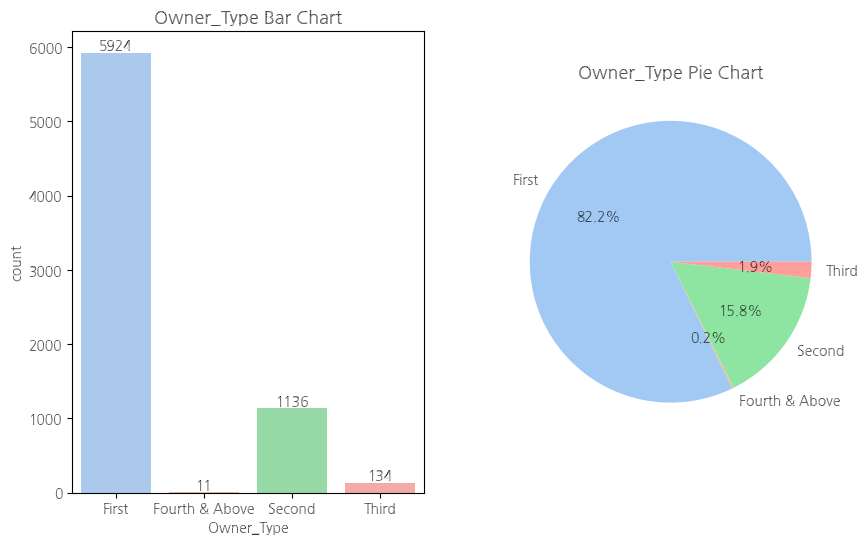

In [28]:
#Owner_Type 
plc_counts = data['Owner_Type'].value_counts().sort_index()
print(plc_counts)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p2=sns.countplot(x='Owner_Type', data=data, ax=axs[0], palette=colors, order=plc_counts.index)
axs[0].bar_label(p2.containers[0], fmt='%d') 
axs[1].pie(plc_counts, labels=plc_counts.index, autopct='%.1f%%', colors=colors)

axs[0].set_title('Owner_Type Bar Chart', fontsize=13)
axs[1].set_title('Owner_Type Pie Chart', fontsize=13)
plt.show()

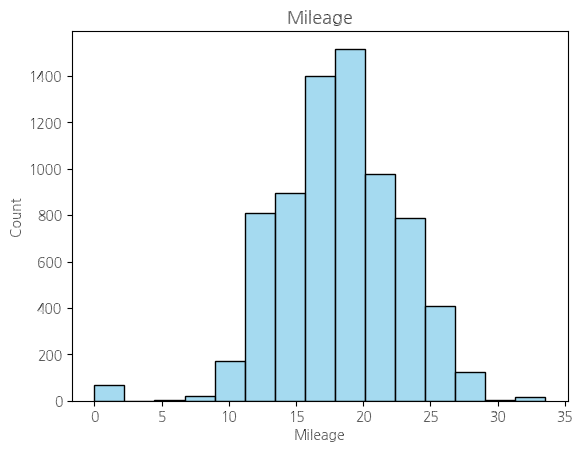

In [29]:
sns.histplot(data=data, x='Mileage', bins=15, color="skyblue")
plt.title('Mileage', fontsize=13)
plt.xticks(np.arange(0, 40, 5))
plt.show()

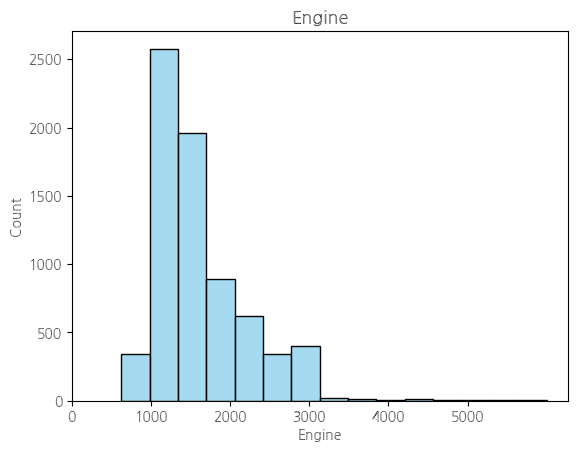

In [30]:
sns.histplot(data=data, x='Engine', bins=15,  color="skyblue")
plt.title('Engine', fontsize=13)
plt.xticks(np.arange(0, 6000, 1000))
plt.show()

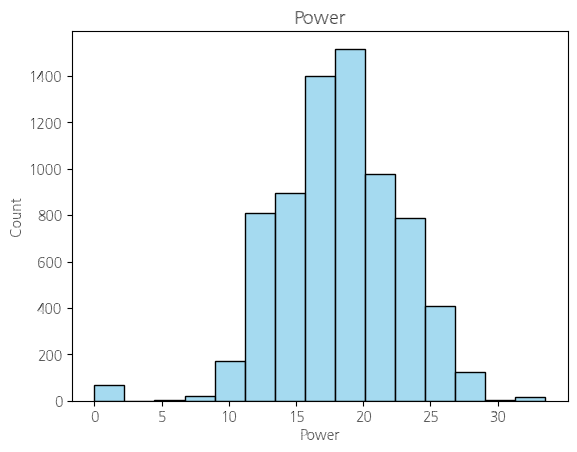

In [31]:
sns.histplot(data=data, x='Power', bins=15,  color="skyblue")
plt.title('Power', fontsize=13)
plt.xticks(np.arange(0, 35, 5))
plt.show()

0.0        1
2.0       18
4.0      119
5.0     6045
6.0       38
7.0      796
8.0      170
9.0        3
10.0       8
Name: Seats, dtype: int64


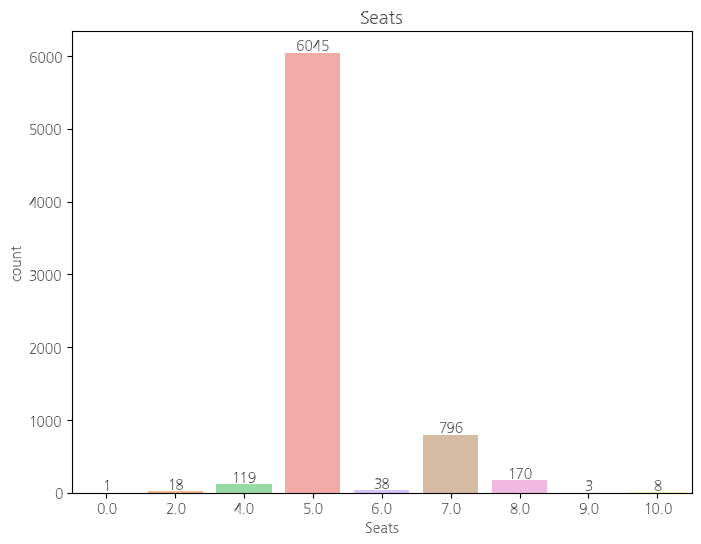

In [33]:
plc_counts = data['Seats'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p2 = sns.countplot(x='Seats', data=data, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p2.containers[0], fmt='%d') 

ax.set_title('Seats', fontsize=13)

plt.show()

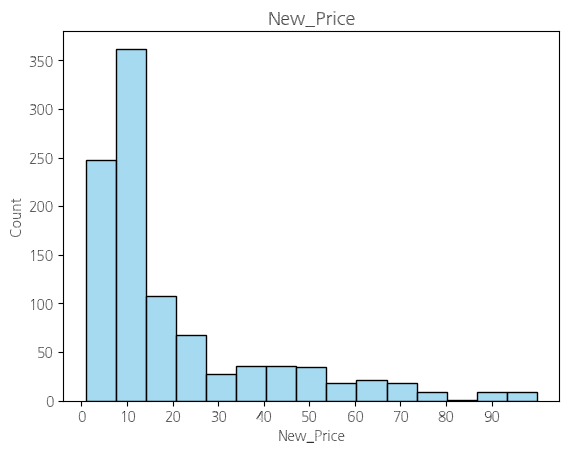

In [34]:
sns.histplot(data=data, x='New_Price', bins=15,  color="skyblue")
plt.title('New_Price', fontsize=13)
plt.xticks(np.arange(0, 100, 10))
plt.show()